In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import streamlit as st
from PIL import Image

In [2]:
#Mengekstrak File json 
with open("kode_negara_lengkap.json") as f:
    dj = json.load(f)
dj

[{'name': 'Afghanistan',
  'alpha-2': 'AF',
  'alpha-3': 'AFG',
  'country-code': '004',
  'iso_3166-2': 'ISO 3166-2:AF',
  'region': 'Asia',
  'sub-region': 'Southern Asia',
  'intermediate-region': '',
  'region-code': '142',
  'sub-region-code': '034',
  'intermediate-region-code': ''},
 {'name': 'Ã…land Islands',
  'alpha-2': 'AX',
  'alpha-3': 'ALA',
  'country-code': '248',
  'iso_3166-2': 'ISO 3166-2:AX',
  'region': 'Europe',
  'sub-region': 'Northern Europe',
  'intermediate-region': '',
  'region-code': '150',
  'sub-region-code': '154',
  'intermediate-region-code': ''},
 {'name': 'Albania',
  'alpha-2': 'AL',
  'alpha-3': 'ALB',
  'country-code': '008',
  'iso_3166-2': 'ISO 3166-2:AL',
  'region': 'Europe',
  'sub-region': 'Southern Europe',
  'intermediate-region': '',
  'region-code': '150',
  'sub-region-code': '039',
  'intermediate-region-code': ''},
 {'name': 'Algeria',
  'alpha-2': 'DZ',
  'alpha-3': 'DZA',
  'country-code': '012',
  'iso_3166-2': 'ISO 3166-2:DZ',
  

In [3]:
#Mengekstrak File csv
df = pd.read_csv("produksi_minyak_mentah.csv")
df

,kode_negara,tahun,produksi
0,AUS,1971,14226.194
1,AUS,1972,15029.094
2,AUS,1973,18720.577
3,AUS,1974,18498.696
4,AUS,1975,19736.070
...,...,...,...
5834,ZWE,2011,0.000
5835,ZWE,2012,0.000
5836,ZWE,2013,0.000
5837,ZWE,2014,0.000


In [4]:
#Mengonversi Kode Negara pada File csv Menjadi Nama Negara dari File json
nama_negara={item['alpha-3']:item['name']for item in dj}
df.loc[:,'kode_negara']=df['kode_negara'].map(nama_negara)
df = df.rename(columns={'kode_negara':'nama_negara'})
df

,nama_negara,tahun,produksi
0,Australia,1971,14226.194
1,Australia,1972,15029.094
2,Australia,1973,18720.577
3,Australia,1974,18498.696
4,Australia,1975,19736.070
...,...,...,...
5834,Zimbabwe,2011,0.000
5835,Zimbabwe,2012,0.000
5836,Zimbabwe,2013,0.000
5837,Zimbabwe,2014,0.000


In [5]:
#Menghapus Data Nama Negara yang Mengandung Nilai Missing Values (NaN)
df.dropna(subset=['nama_negara'], inplace=True)
#Membuat List Nama Negara Lengkap dan Menghapus Nama Negara Duplikat  
list_negara = df['nama_negara'].drop_duplicates().tolist()
list_negara


['Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Czechia',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Japan',
 'Korea, Republic of',
 'Luxembourg',
 'Mexico',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Poland',
 'Portugal',
 'Slovakia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'United Kingdom of Great Britain and Northern Ireland',
 'United States of America',
 'Albania',
 'Algeria',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bangladesh',
 'Belarus',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Cambodia',
 'Chile',
 'China',
 'Colombia',
 'Croatia',
 'Cyprus',
 'Egypt',
 'Estonia',
 'Ethiopia',
 'Georgia',
 'Ghana',
 'Haiti',
 'Hong Kong',
 'India',
 'Indonesia',
 'Iran (Islamic Republic of)',
 'Israel',
 'Kazakhstan',
 'Latvia',
 'Lithuania',
 'North Macedonia',
 'Malaysia',
 'Malta',
 'Moldova, Republic of',
 'Mozambique',
 'Nigeria',
 'Pakistan',
 'Paraguay',
 'Peru',
 'Philippin

   nama_negara  tahun  produksi
45     Austria   1971  2628.081
46     Austria   1972  2515.406
47     Austria   1973  2635.187
48     Austria   1974  2295.130
49     Austria   1975  2067.749
50     Austria   1976  1960.149
51     Austria   1977  1788.597
52     Austria   1978  1818.035
53     Austria   1979  1752.054
54     Austria   1980  1469.858


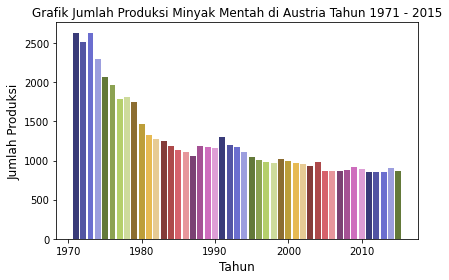

In [7]:
#Misal Austria (indeks=1)
negara = list_negara[1]

#Memfilter Data Frame File csv Sesuai Negara Pilihan User
filter_negara = df["nama_negara"]==negara
data_negara_pilihan = df[filter_negara]

#Membuat Tabel Representasi Data dari Negara Pilihan User
n_tampil = 10
tabel = data_negara_pilihan.head(n_tampil)
print(tabel)

#Fitur 1 : Membuat Grafik Jumlah Produksi terhadap Tahun dari negara N; N pilihan user
cmap_name = 'tab20b'
cmap = cm.get_cmap(cmap_name)
colors = cmap.colors[:len(data_negara_pilihan)]
fig, ax = plt.subplots()
ax.bar(data_negara_pilihan["tahun"], data_negara_pilihan["produksi"], color=colors)
ax.set_title(f"Grafik Jumlah Produksi Minyak Mentah di {negara} Tahun 1971 - 2015")
ax.set_xlabel("Tahun", fontsize=12)
ax.set_ylabel("Jumlah Produksi", fontsize=12)
plt.tight_layout()

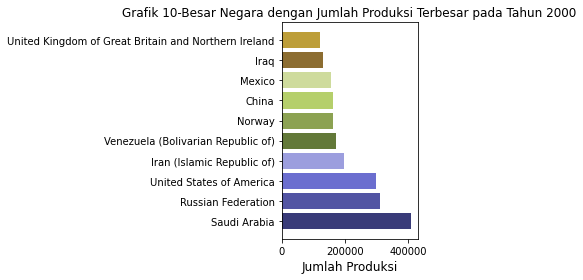

In [8]:
#Misal :
tahun_pilihan = 2000
jumlah_negara_pilihan = 10
#Memfilter Data Frame File csv Sesuai Jumlah Negara dan Tahun Pilihan User
filter_tahun = df["tahun"]==tahun_pilihan
data_jumlah_pilihan = df[filter_tahun].sort_values(by=["produksi"], ascending=False).head(jumlah_negara_pilihan)
#Fitur 2 :Membuat Grafik B-besar Negara dengan Jumlah Produksi Terbesar pada Tahun T; B dan T pilihan User
cmap_name = 'tab20b'
cmap = cm.get_cmap(cmap_name)
colors = cmap.colors[:len(data_jumlah_pilihan)]
fig, ax = plt.subplots()
ax.barh(data_jumlah_pilihan["nama_negara"], data_jumlah_pilihan["produksi"], color=colors)
ax.set_title(f"Grafik {jumlah_negara_pilihan}-Besar Negara dengan Jumlah Produksi Terbesar pada Tahun {tahun_pilihan}")
ax.set_xlabel("Jumlah Produksi", fontsize=12)
plt.tight_layout()

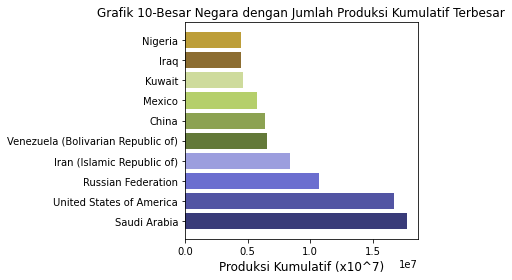

In [10]:
#Memfilter Data Frame File csv Sesuai Jumlah Negara dan Tahun Pilihan User
df["produksi_kumulatif"] = df.groupby(["nama_negara"])["produksi"].transform("sum")
#Membuat Data Frame Baru dan Menghapus Nama Negara Duplikat  
df_negara = df.drop_duplicates(subset=["nama_negara"])
data_kumulatif_pilihan = df_negara.sort_values(by=["produksi_kumulatif"], ascending=False).head(jumlah_negara_pilihan)
#Fitur 3 : Grafik B-besar Negara dengan Jumlah Produksi Kumulatif Terbesar; B pilihan user
cmap_name = 'tab20b'
cmap = cm.get_cmap(cmap_name)
colors = cmap.colors[:len(data_kumulatif_pilihan)]
fig, ax = plt.subplots()
ax.barh(data_kumulatif_pilihan["nama_negara"], data_kumulatif_pilihan["produksi_kumulatif"], color=colors)
ax.set_title(f"Grafik {jumlah_negara_pilihan}-Besar Negara dengan Jumlah Produksi Kumulatif Terbesar")
ax.set_xlabel("Produksi Kumulatif (x10^7)", fontsize=12)
plt.tight_layout()

In [14]:
#Fitur 4 : SUMMARY Nama Lengkap Negara, Kode Negara, Region, dan Sub-Region
#A1. Jumlah Produksi Terbesar pada Tahun T, T Pilihan User
#Memfilter Data Frame File csv Sesuai Tahun Pilihan User
filter_tahun = df["tahun"]==tahun_pilihan
max_tahun_pilihan = df[filter_tahun].sort_values(by=["produksi"], ascending=False).head(1)
produksi = np.asarray(max_tahun_pilihan["produksi"])
negara_max_tahun_pilihan = np.asarray(max_tahun_pilihan["nama_negara"])
for item in dj:
    if (item["name"]==negara_max_tahun_pilihan):
        kode = [item["alpha-3"]]
        region = [item["region"]]
        sub_region = [item ["sub-region"]]
kode = np.asarray(kode)
region = np.asarray(region)
sub_region = np.asarray(sub_region)
print("~ Negara dengan Jumlah Produksi Terbesar pada Tahun", tahun_pilihan,":", negara_max_tahun_pilihan, "dengan Jumlah Produksi", produksi, "code country:", kode, "region:", region, "sub-region:", sub_region)

#A2. Jumlah Produksi Terbesar pada Keseluruhan Tahun
max_total = df.sort_values(by=['produksi_kumulatif'], ascending=False).head(1)
produksi = np.asarray(max_total['produksi_kumulatif'])
negara_max_total = np.asarray(max_total['nama_negara'])
for item in dj:
    if (item['name'])==negara_max_total:
        kode = [item['alpha-3']]
        region = [item['region']]
        sub_region = [item['sub-region']]
kode = np.asarray(kode)
region = np.asarray(region)
sub_region = np.asarray(sub_region)
print("~ Negara dengan Jumlah Produksi Terbesar pada Keseluruhan Tahun :", negara_max_total, "dengan Jumlah Produksi", produksi, "code country:", kode, "region:", region, "sub-region:", sub_region)



~ Negara dengan Jumlah Produksi Terbesar pada Tahun 2000 : ['Saudi Arabia'] dengan Jumlah Produksi [410059.696] code country: ['SAU'] region: ['Asia'] sub-region: ['Western Asia']
~ Negara dengan Jumlah Produksi Terbesar pada Keseluruhan Tahun : ['Saudi Arabia'] dengan Jumlah Produksi [17711766.321] code country: ['SAU'] region: ['Asia'] sub-region: ['Western Asia']


In [15]:
#B1. Jumlah Produksi Terkecil (tidak sama dengan nol) pada Tahun T, T Pilihan User
filter1 = df['produksi']!=0
min_tahun_pilihan = df[filter1].sort_values(by=['produksi'], ascending=True)
filter2 = min_tahun_pilihan['tahun']==tahun_pilihan
min_pilihan = min_tahun_pilihan[filter2].sort_values(by=['produksi'], ascending=True).head(1)
produksi = np.asarray(min_pilihan['produksi'])
negara_min_tahun_pilihan = np.asarray(min_pilihan['nama_negara'])
for item in dj:
    if (item['name'])==negara_min_tahun_pilihan:
        kode = [item['alpha-3']]
        region = [item['region']]
        sub_region = [item['sub-region']]
kode = np.asarray(kode)
region = np.asarray(region)
sub_region = np.asarray(sub_region)
print("~ Negara dengan Jumlah Produksi Terkecil pada Tahun", tahun_pilihan, ":", negara_min_tahun_pilihan, "dengan Jumlah Produksi", produksi, "code country:", kode, "region:", region, "sub-region:", sub_region)

#B2. Jumlah Produksi Terkecil (tidak sama dengan nol) pada Keseluruhan Tahun
filter3 = df["produksi_kumulatif"]!=0 
min_total = df[filter3].sort_values(by=['produksi_kumulatif'], ascending=True).head(1)
produksi = np.asarray(min_total["produksi_kumulatif"])
negara_min_total = np.asarray(min_total['nama_negara'])
for item in dj:
    if (item['name'])==negara_min_total:
        kode = [item['alpha-3']]
        region = [item['region']]
        sub_region = [item['sub-region']]
kode = np.asarray(kode)
region = np.asarray(region)
sub_region = np.asarray(sub_region)
print("~ Negara dengan Jumlah Produksi Terbesar pada Keseluruhan Tahun :", negara_min_total, "dengan Jumlah Produksi", produksi, "code country:", kode, "region:", region, "sub-region:", sub_region)


~ Negara dengan Jumlah Produksi Terkecil pada Tahun 2000 : ['Slovenia'] dengan Jumlah Produksi [0.994] code country: ['SVN'] region: ['Europe'] sub-region: ['Southern Europe']
~ Negara dengan Jumlah Produksi Terbesar pada Keseluruhan Tahun : ['Senegal'] dengan Jumlah Produksi [17.306] code country: ['SEN'] region: ['Africa'] sub-region: ['Sub-Saharan Africa']


In [17]:
#C1. Jumlah Produksi = 0 pada Tahun T, T Pilihan User
filter1 = df['produksi']==0
nol_data = df[filter1].sort_values(by=['produksi'])
filter2 = nol_data['tahun']==tahun_pilihan
nol_pil = nol_data[filter2].sort_values(by=['produksi']).drop(columns='produksi_kumulatif', axis=1).head(n_tampil)
negara_nol_pil = nol_pil['nama_negara'].values.tolist()
list_kode = []
list_region = []
list_subregion = []
for negara in negara_nol_pil:
    for item in dj:
        if (item['name'])==negara:
            kode = [(item['alpha-3'])]
            region = (item['region'])
            sub_region = (item['sub-region'])
            list_kode.append(kode)
            list_region.append(region)
            list_subregion.append(sub_region)
#Mengubah ke data frame agar mudah dibaca
nol_pil["kode_negara"] = list_kode
nol_pil["region"] = list_region
nol_pil["sub-region"] = list_subregion
print(nol_pil)

                                  nama_negara  tahun  produksi kode_negara  \
4273  Korea (Democratic People's Republic of)   2000       0.0       [PRK]   
1819                                 Cambodia   2000       0.0       [KHM]   
1663                   Bosnia and Herzegovina   2000       0.0       [BIH]   
1540                                  Armenia   2000       0.0       [ARM]   
1611                               Bangladesh   2000       0.0       [BGD]   
749                                Luxembourg   2000       0.0       [LUX]   
299                                   Finland   2000       0.0       [FIN]   
119                                   Belgium   2000       0.0       [BEL]   
704                        Korea, Republic of   2000       0.0       [KOR]   
524                                   Iceland   2000       0.0       [ISL]   

      region          sub-region  
4273    Asia        Eastern Asia  
1819    Asia  South-eastern Asia  
1663  Europe     Southern Europe  
1

In [19]:
#C2. Jumlah Produksi = 0 pada Keseluruhan Tahun
filter3 = df['produksi_kumulatif']==0
nol_total = df[filter3].sort_values(by=['produksi_kumulatif']).drop(columns='produksi', axis=1).drop(columns='tahun',axis=1).drop_duplicates(subset=['nama_negara']).head(n_tampil)
negara_nol_total = nol_total['nama_negara'].values.tolist()
list_kode = []
list_region = []
list_subregion = []
for negara in negara_nol_total:
    for item in dj:
        if (item['name']) == negara:
            kode = [(item['alpha-3'])]
            region = (item['region'])
            sub_region = (item['sub-region'])
            list_kode.append(kode)
            list_region.append(region)
            list_subregion.append(sub_region)
#Mengubah ke data frame agar mudah dibaca
nol_total["kode_negara"] = list_kode
nol_total["region"] = list_region
nol_total["sub-region"] = list_subregion
print(nol_total)

                                  nama_negara  produksi_kumulatif kode_negara  \
90                                    Belgium                 0.0       [BEL]   
4425                              El Salvador                 0.0       [SLV]   
4378                       Dominican Republic                 0.0       [DOM]   
4284  Korea (Democratic People's Republic of)                 0.0       [PRK]   
4618                                 Honduras                 0.0       [HND]   
4689                                  Jamaica                 0.0       [JAM]   
4477                                  Eritrea                 0.0       [ERI]   
3583                                   Zambia                 0.0       [ZMB]   
3680                               Montenegro                 0.0       [MNE]   
3514                                  Uruguay                 0.0       [URY]   

        region                       sub-region  
90      Europe                   Western Europe  
4425  Am